# Fuzzy Clustering

In this notebook, we will explore the fuzzy clustering approach with the iris dataset. We will perform following tasks. 

1. Reduce 4 iris features to 2 using PCA. Apply standardization before applying PCA. 
2. Apply Fuzzy C-Means on the transformed data
3. Identify strong and weak member for a cluster


In [79]:
import skfuzzy as fuzz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
%matplotlib inline

### Configure some general styling

In [80]:
sns.set_style("white")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.figsize'] = (8,7)
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

### T1. Read the data

Read the data from this location: `/dsa/data/DSA-8410/USArrests.csv`

In [81]:
df = pd.read_csv("/dsa/data/DSA-8410/USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [82]:
df = df.drop(['Unnamed: 0'], axis=1)

### T2. Standardize the data

In [83]:
df_std = StandardScaler().fit_transform(df)

### T3. Apply PCA

In [84]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_std)

### T4. Reshape the data for fuzzy c-means

In [85]:
data = components.T
print("The input data to the cmenas function has a size of:", np.shape(data))

The input data to the cmenas function has a size of: (2, 50)


### T5. Visualize the data in 2D space

Text(0, 0.5, 'Prinicipal Component 2')

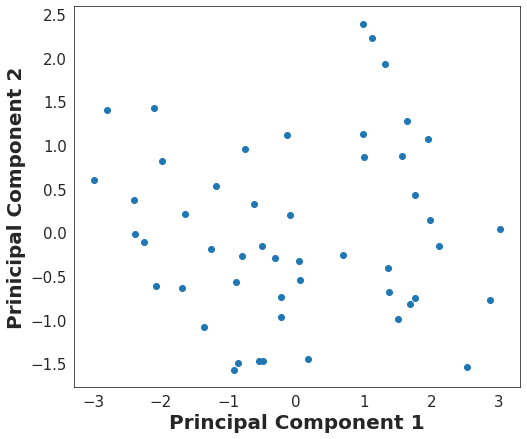

In [91]:
plt.scatter(components[:,0],components[:,1])

plt.xlabel("Principal Component 1")
plt.ylabel("Prinicipal Component 2")

# There are no obvious clusters

### T6. Choose the right number of clusters using the fuzzy partition coefficient (FPCs). Plot FPCs vs #clusters. For this plot, choose a suitable set of clusters.  

In [92]:
maxCenters= 5
FPCs=[]
for ncenters in range(2, maxCenters + 1):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data,  ncenters, 2, error=0.005, maxiter=1000, init=None)
    FPCs.append(fpc)

Text(0, 0.5, 'fuzzy partition coefficient')

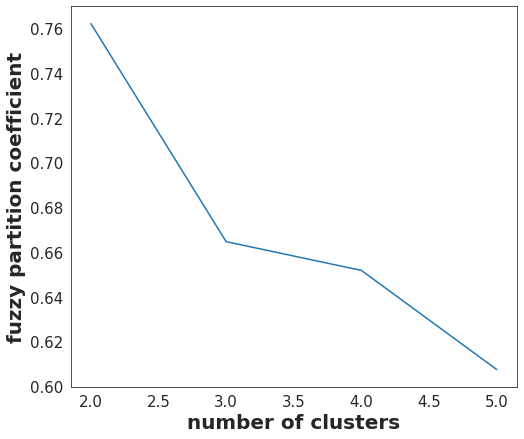

In [93]:
plt.plot(range(2, maxCenters + 1),FPCs)
plt.xlabel("number of clusters")
plt.ylabel("fuzzy partition coefficient")

# We will use two since that is the minimum we can use

### T7. Apply fuzzy c-means with the suitable number of clusters identified in T5

In [95]:
ncenters=2

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data, ncenters, 2, error=0.005, maxiter=3000, init=None)

### T8. Visualize the clusters with centers

Text(0.5, 1.0, 'Visualization of the clusters (c-means)')

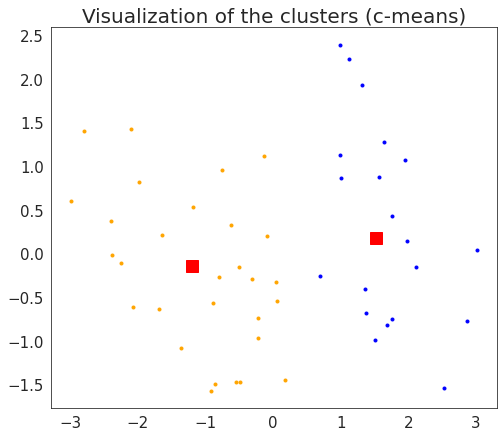

In [96]:
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)

plt.title("Visualization of the clusters (c-means)")

### T9. Indentify the strongest and weakest member of Cluster #2. Visualize these two points.

In [97]:
weak = u[1,:].min()
strong = u[1,:].max()
weakIdx = u[1,:].argmin()
strongIdx = u[1,:].argmax()

print(f"{weakIdx}-th sample is the weakest member and the probability is {weak}")
print(f"{strongIdx}-th sample is the strongest member and the probability is {strong}")

19-th sample is the weakest member and the probability is 0.013121865045632343
26-th sample is the strongest member and the probability is 0.9992093239734927


Text(0.5, 1.0, 'Visualization of the clusters#2 and membership')

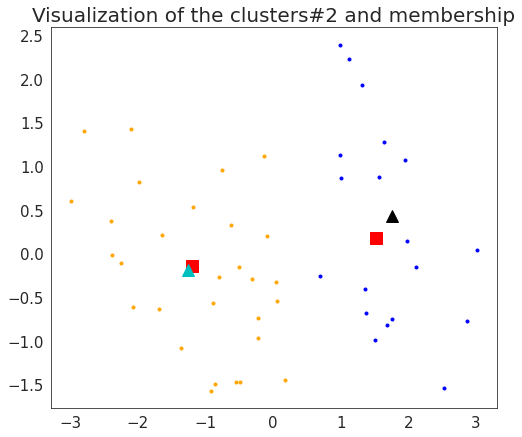

In [101]:
for j in range(ncenters):
    plt.plot(data[0,:][cluster_membership == j],data[1,:][cluster_membership == j], 
             '.', color=colors[j])
    
# Mark the center of each fuzzy cluster
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs', markersize=12)
    
plt.plot(data[0,weakIdx],data[1,weakIdx],'^k:', markersize=12)
plt.plot(data[0,strongIdx],data[1,strongIdx],'^c:', markersize=12)

plt.title("Visualization of the clusters#2 and membership")

### T10. Do these weak and strong points make sense? Why or Why not?

Yes, as the yellow cluster must be cluster number 2. The cyan triangle is closest to the center, whereas the black triangle is the point that is most strongly a member of cluster number 1.